In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
data=pd.read_excel("finaccess.xls")
data.head()

,Residence,Household Size,Resp,Age,Education,Marital,Income,Save_Micro,Sav_Mobank,Sav_Mob,...,Light_Type,Main_Water,Toilet_Type,Bread,Fish,Banana,Towels,Flask,Own_Land,House_0ship
0,0,6,0,49,2,3,0,0,2,2,...,3,7,4,1,0,0,0,0,0,5
1,0,7,0,43,2,3,1,0,0,2,...,0,7,3,0,0,0,0,0,0,1
2,0,5,0,55,1,3,0,0,0,2,...,3,7,4,1,0,1,1,0,1,0
3,0,12,1,55,0,3,0,0,0,0,...,2,1,4,1,1,1,0,1,1,0
4,0,4,0,63,0,3,7,0,0,0,...,3,7,0,0,0,0,0,0,0,1


In [3]:
print(data.shape)

(8669, 72)


In [4]:
#Check for dtypes
data.dtypes

Residence         int64
Household Size    int64
Resp              int64
Age               int64
Education         int64
                  ...  
Banana            int64
Towels            int64
Flask             int64
Own_Land          int64
House_0ship       int64
Length: 72, dtype: object

In [5]:
#check for missing values 
data.isnull().sum()

Residence         0
Household Size    0
Resp              0
Age               0
Education         0
                 ..
Banana            0
Towels            0
Flask             0
Own_Land          0
House_0ship       0
Length: 72, dtype: int64

In [6]:
# Columns Consistency
data.columns

Index([     'Residence', 'Household Size',           'Resp',            'Age',
            'Education',        'Marital',         'Income',     'Save_Micro',
           'Sav_Mobank',        'Sav_Mob',       'Sav_Coop',     'Save_Chama',
          'Sav_Friends',    'Sav_FamKeep',     'Sav_Secret',        'Mob_M1y',
             'Mob_Bank',      'Loan_Bank',    'Loan_Mobank',      'Loan_Coop',
           'Loan_Micro',       'Loan_Shy',     'Loan_Chama',       'Loan_Gov',
             'Loan_Emp',    'Loan_Friend',      'Loan_Shop',    'Credit_Shop',
            'Digi_Loan',      'Loan_Agri',  'Hire_Purchase',     'Loan_House',
           'Loan_Gov.1',       'Curr_Acc',       'Post_Acc',        'Inv_Acc',
          'Everday_Acc',        'Bank_OD',       'Atm_Card',    'Credit_Card',
               'Shares',        'T_Bills',   'Mutual_Funds',        'Car_Ins',
             'Home_Ins',       'Crop_Ins',       'Live_Ins',           'NHIF',
              'Med-Ins',       'Life_Ins',        'E

In [7]:
data.dtypes[data.dtypes != 'int64']

Light_Type    object
dtype: object

In [8]:
data1=data['Light_Type']
data1.isnull().sum()

0

In [9]:
#dropping the Light_type column
data1= data.drop(['Light_Type'], axis = 1)
data1.head()

,Residence,Household Size,Resp,Age,Education,Marital,Income,Save_Micro,Sav_Mobank,Sav_Mob,...,Fuel_Type,Main_Water,Toilet_Type,Bread,Fish,Banana,Towels,Flask,Own_Land,House_0ship
0,0,6,0,49,2,3,0,0,2,2,...,0,7,4,1,0,0,0,0,0,5
1,0,7,0,43,2,3,1,0,0,2,...,0,7,3,0,0,0,0,0,0,1
2,0,5,0,55,1,3,0,0,0,2,...,0,7,4,1,0,1,1,0,1,0
3,0,12,1,55,0,3,0,0,0,0,...,6,1,4,1,1,1,0,1,1,0
4,0,4,0,63,0,3,7,0,0,0,...,0,7,0,0,0,0,0,0,0,1


In [10]:
#K-Means before performing PCA
"""%%time
from sklearn.cluster import KMeans
xfeatures= data1

wcss = []
for i in range(1, 5):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(xfeatures)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 5), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()"""

"%%time\nfrom sklearn.cluster import KMeans\nxfeatures= data1\n\nwcss = []\nfor i in range(1, 5):\n    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)\n    km.fit(xfeatures)\n    wcss.append(km.inertia_)\n    \nplt.plot(range(1, 5), wcss)\nplt.title('The Elbow Method', fontsize = 20)\nplt.xlabel('No. of Clusters')\nplt.ylabel('wcss')\nplt.show()"

In [11]:
print(data1.shape)

(8669, 71)


In [12]:
#Performing Principal Component Analysis
#scaling
from sklearn.preprocessing import StandardScaler 

In [13]:
scaler=StandardScaler()
scaler.fit(data1)

StandardScaler()

In [14]:
scaled_data=scaler.transform(data1)

In [15]:
scaled_data

array([[-0.84493701,  0.87249105, -1.16903352, ..., -1.58062829,
        -1.11580468,  2.53761109],
       [-0.84493701,  1.30319687, -1.16903352, ..., -1.58062829,
        -1.11580468, -0.07310548],
       [-0.84493701,  0.44178523, -1.16903352, ..., -1.58062829,
         0.8103026 , -0.72578463],
       ...,
       [ 1.18352018, -1.28103805, -1.16903352, ...,  0.63265981,
        -1.11580468,  1.2322528 ],
       [-0.84493701,  0.01107941,  0.85540747, ...,  0.63265981,
         0.8103026 , -0.72578463],
       [ 1.18352018, -0.41962641,  0.85540747, ...,  0.63265981,
        -1.11580468,  1.2322528 ]])

In [16]:
from sklearn.decomposition import PCA

Text(0, 0.5, 'cumulative variance')

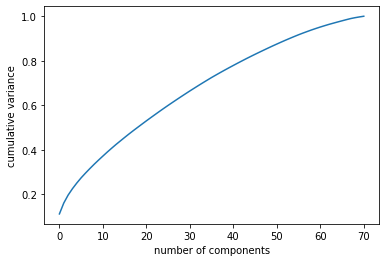

In [17]:
#this heuristic helps us to determine the number of n_components needed 
pca = PCA().fit(scaled_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative variance')

In [18]:
#we need to use around 60 components i.e 95% of the variance
pca=PCA(n_components=60)

In [19]:
pca.fit(scaled_data)

PCA(n_components=60)

In [20]:
x_pca=pca.transform(scaled_data)

In [21]:
scaled_data.shape

(8669, 71)

In [22]:
x_pca.shape

(8669, 60)

In [23]:
#scaled_data

In [24]:
x_pca

array([[ 0.42229041,  0.3049797 , -2.13291419, ..., -0.01125212,
         0.57226759,  0.51857052],
       [-3.53879313,  0.89337238,  0.12514841, ..., -0.38388209,
         0.36413068, -0.62683685],
       [-2.2465313 ,  1.34957458, -1.11906843, ...,  0.31894796,
        -0.06810332, -1.19642693],
       ...,
       [ 2.46678065, -3.08753916, -0.80463681, ..., -0.1559961 ,
         0.02802525,  0.68912137],
       [-1.21884201, -0.31934523, -0.13431131, ...,  1.06899454,
         0.344143  ,  0.10687373],
       [ 2.73992688, -1.90461857, -2.75417996, ...,  0.54385083,
         0.50796731,  0.46724837]])

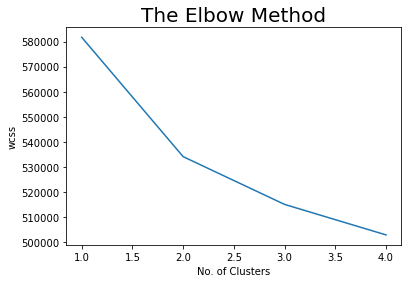

In [25]:
#Now we apply K-Means Clustering algorithm

from sklearn.cluster import KMeans
xfeatures= x_pca

wcss = []
for i in range(1, 5):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(xfeatures)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 5), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [39]:
#From the elbow method we identify two clusters
#This means that the data has been grouped either into financially underserved or NOT Financially underserved





In [40]:
%%time
from sklearn.metrics import silhouette_score

kmeans= KMeans(n_clusters=2).fit_predict(x_pca)
print(silhouette_score(x_pca,kmeans))

0.15003645489876608
Wall time: 24.1 s
